In [1]:
# Material last updated: 15 Oct 2022
# Note materials were designed with the Roboto Condensed font, which can be installed here: https://www.1001fonts.com/roboto-condensed-font.html

from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{ 
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
    <script> code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script>
    <form action="javascript:code_toggle()"><input type="submit" value="Hide/show all code."></form>
''')

# Group 3 - Trends in Step Activity across the Week


## Driving Q

## Ethical Analysis

### Stakeholder

### Raw Data

# Setup

### Library import


In [2]:
# Data manipulation
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from pathlib import Path

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


### Data Import

In [3]:
# Include data paths
dataset_path = Path('../../datasets')
add_dataset_path = Path('../../datasets/additional')
# Import datasets
raw_data_p1 = pd.read_csv(dataset_path / 'Participant-01.csv')
p1 = raw_data_p1.copy()

raw_data_p2 = pd.read_csv(dataset_path / 'Participant-02-detail.csv')
p2 = raw_data_p2.copy()

raw_data_p3 = pd.read_csv(dataset_path / 'Participant-03.csv')
p3 = raw_data_p3.copy()

raw_data_p4 = pd.read_csv(dataset_path / 'Participant-04.csv')
p4 = raw_data_p4.copy()


raw_data_p5 = pd.read_csv(dataset_path / 'Participant-05-detail.csv')
p5 = raw_data_p5.copy()

raw_data_p7 = pd.read_csv(dataset_path / 'Participant-07.csv')
p7 = raw_data_p7.copy()

raw_data_p8 = pd.read_csv(dataset_path / 'Participant-08.csv')
p8 = raw_data_p8.copy()

# for climate datasets the year month day are separated i need them to be together therefore i parsed them together
raw_data = pd.read_csv(add_dataset_path / 'rainfall_syd.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sydrain = raw_data.copy()

raw_data2 = pd.read_csv(add_dataset_path / 'solar_cent_park.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sun = raw_data2.copy()

# Data Cleaning

1. The variable name containing data for step counts is different therefore is renamed 'Steps" in all 7 datasets so there is consistency.

In [4]:
# change count name so it matches format of non-detail datasets
p1 = p1.rename(columns={'Steps (count)':'Steps'})
p2 = p2.rename(columns={'Count':'Steps'})
p3 = p3.rename(columns={'Steps (count)':'Steps'})
p4 = p4.rename(columns={'Steps (count)':'Steps'})
p5 = p5.rename(columns={'Count':'Steps'})
p7 = p7.rename(columns={'Steps (count)':'Steps'})
p8 = p8.rename(columns={'Steps (count)':'Steps'})



2. From duplicate testing, duplicated were found for the datasets of p2 and p5 therefore these duplicate values are dropped from the datasets.

In [5]:
# will now drop the duplicates as identified by duplicated testing 
p2.drop_duplicates(keep=False, inplace=True)
p5.drop_duplicates(keep=False, inplace=True)

# Data Processing 

1. Before the data can be used the dates given in the datasets need to be converted to datetime datatype, the weekday name, month names,year and date in YYYY-MM-DD need to be extracted and added as a column to the dataset, and the days of the weeks ordered from weekday to weekend so that when displayed it does not cause confusion.

    Days of the week are ordered like so: 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', as it is a familiar order of the days of the week to most people.

    Due to the different formating of the raw data given, there is different operations that apply on the datasets therefore two functions are used to complete what is mentioned in the paragraph above. 

    Function sub(data) is used for the datasets for participant 1, 3, 4, 7, 8. e.g sub(p1)

    Function subdetail(data) is used for detailed datasets of participant 2 and 5 e.g. subdetail(p2)


In [6]:
# i want to create a function that subs in the dataset for the following operations so I don't have to repeat these steps
def sub(data):
#     convert start,finish columns to datetime formats
    data['Start'] = pd.to_datetime(data['Start'])
    data['Finish'] = pd.to_datetime(data['Finish'])
#     extract the weekday name, month names , year and date in YYYY-MM-DD format from start column
    data['WeekDay'] = data['Start'].dt.day_name()
    data['Month'] = data['Start'].dt.month_name()
    data['Year'] = data['Start'].dt.year
    data['Date'] = data['Start'].dt.date
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     week days are ordered so that it's matches the order that day of the week are.
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

    


In [7]:
# function for detail data
def subdetail(data):
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     extract week day and month from date
    data['WeekDay'] = data['Date'].dt.day_name()
    data['Month'] = data['Date'].dt.month_name()
    data['Year'] = data['Date'].dt.year
#     order week days
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

    


2. As data for solar exposure and rainfall is also used in this analysis, a function is also created to add the month and day of the week to the dataset, and order the days of the week into the order that is commonly known.

    Function subw(data) is used for the dataset 'sydrain' or 'sun'

In [8]:

# function for weather dataset
def subw(data):
#     extract week day and month from date
    data['Month'] = data['Date'].dt.month_name()
    data['WeekDay'] = data['Date'].dt.day_name()
#     order week days
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['WeekDay'] = data['WeekDay'].astype(cat_type)

In [9]:
# now sub the datasets into the functions
sub(p1)
subdetail(p2)
sub(p3)
sub(p4)
subdetail(p5)
sub(p7)
sub(p8)
subw(sydrain)
subw(sun)


3. Participant 2 dataset contains data points from both their mobile phone and smartwatch, aggregating would resulting in duplicate data. We keep only data from the smartwatch as it is usually more accurate.

In [10]:


#     dataset contains data points from both their mobile phone and smartwatch, 
# aggregating would resulting in duplicate data. We keep only data from the smartwatch as it is usually more accurate
p2 = p2[p2['Source'].str.contains('Watch')]



4. Detailed datasets are group by hour as it has more than one record for each hour in comparision to the non-detailed datasets where each hour only exist once.

In [11]:
# group by hour as detailed datasets has more than one record for each hour incomparision to the non-detailed datasets.
p2 = p2.groupby(['Date','Hour']).agg({'Steps':'sum','WeekDay':'first','Month':'first','Year':'first','Source':'first'}).reset_index()
p5 = p5.groupby(['Date','Hour']).agg({'Steps':'sum','WeekDay':'first','Month':'first','Year':'first','Source':'first'}).reset_index()

# Sub Questions

### Does the week day step patterns differ with season?

It has been researched that people can tend to be less active during Winter time as they staying indoors more due to the cold. Therefore we want to analyse if participants' step activity are impacted by the seasonal changes. 

Initial Hypothesis: Participants will be the most active in summer in participular the weekends.

Reason: hypothesis is formed with knowledge that people then to be less active in winter and that Australia being a country that isn't typically known for winter sports but more summer sports, therefore it would be understandable if participant's activity dropped in the winter and be the highest in summer as not only they have accessibility to summer sports now but that are also more likely to go out of the house.


Assumptions made: that the participants were all in Australia during the whole 8 month duration as the months are grouped based on the Australian classification of the seasons where;

Spring - September, October and November.

Summer - December, January and February.

Autumn - March, April and May.

Winter - June, July and August.

However, as we are lacking in data for the months of September, October and November, the season of Spring is not analysed in this sub question.


A bar graph is chosen to compare the three seasons as when comparing trends across the week in different seasons, bar graphs provides a simple and direct visualisation of the seasons side by side enabling direct comparision. The numbers of colours used is also not excessive. There is a drop down menu provided which enables the viewer to view the trends for each season, instead of all the seasons at once, this allows more a clearer view of the trend in each season.

_to view the graph for a different participant, please change the code in the code block below, then run both code blocks below_

In [51]:
# Function that creates a dataset to only have these three months
def getMonths(input, m1, m2, m3):
    return input.loc[(input.Date.dt.month==m1) | (input.Date.dt.month==m2) | (input.Date.dt.month==m3)]

# Group by date. 
# SWITCH HERE! For a different participant, change 'p3' to participant 'p1', 'p2', 'p7' etc.
df = p8.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})

# sub the function in
Autumn = getMonths(df,3,4,5)
Winter = getMonths(df,6,7,8)
Summer = getMonths(df,12,1,2)

# group by weekday
Aut = Autumn.groupby('WeekDay').agg({'Steps':'mean'}).reset_index()
Win = Winter.groupby('WeekDay').agg({'Steps':'mean'}).reset_index()
Sum = Summer.groupby('WeekDay').agg({'Steps':'mean'}).reset_index()

Now as an example, lets visualise Participant 8's average step count across the week for different seasons.

_please first click on the drop down menu to select the graph_

In [52]:
# This is an interactive graph allows you to compares the seasons but also each season by it self. Able to analyse the trends separately
# THIS CODE BLOCK DOES NOT NEED TO BE CHANGED when switching participants!!! Just rerun this block!
# Initialize figure
fig = go.Figure()

# Add Traces which are basically the layers for the graph, set colours to colours that are typically associated with each season
fig.add_trace(
    go.Bar(name='Summer', x=Sum["WeekDay"], y=Sum['Steps'],marker_color='rgb(240, 90, 101)'))

fig.add_trace(
    go.Bar(name='Autumn', x=Aut["WeekDay"], y=Aut['Steps'],marker_color='rgb(250, 148, 34)'))

fig.add_trace(
    go.Bar(name='Winter', x=Win["WeekDay"], y=Win['Steps'],marker_color='rgb(83, 205, 241)'))

# put the traces together with a drop down menu, along with title, x-axis label, y-axis label
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Seasons",
                     method="update",
                     args=[{"visible": [True, True, True]},
                           {"title": "Average step count of days of the week over in different seasons",
                           'xaxis': {'title': 'Day of the Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Summer",
                     method="update",
                     args=[{"visible": [True, False, False]},
                           {"title": "Average step count of days of the week over in Summer",
                           'xaxis': {'title': 'Day of the Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Autumn",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Average step count of days of the week over in Autumn",
                           'xaxis': {'title': 'Day of the Week'},
                          'yaxis': {'title': 'Average Step Count'}}]),
                dict(label="Winter",
                     method="update",
                     args=[{"visible": [False,False, True]},
                           {"title": "Average step count of days of the week over in Winter",
                           'xaxis': {'title': 'Day of the Week'},
                          'yaxis': {'title': 'Average Step Count'}}])
                
                
            ]),
        )
    ])

# Update the positioning of title and gap between bars.
fig.update_layout(
    title_x=0.5,
    
        legend=dict(
            x=0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        barmode='group',
        bargap=0.15, # gap between bars of adjacent location coordinates.
        bargroupgap=0.1 # gap between bars of the same location coordinate.
    )


We can see that the assumption for participants being most active in the summer is not applicable to this participant as for everyday across the week, it can be observed that Summer has the lowest steps in comparision to Autumn and Winter. Autumn seems to be the season where the steps counts are highest for this participant. Looking at each season separately, we can see this participant has higher step counts on Saturdays.

**Overall Results**

The assumptions that Participants would have higher step counts for weekends during the summer is not True as besides Participant 3 which showed a clear difference that during summer the step counts increase for the weekends, no other participant show a hgiher step activity for weekends in summer. There were 2 participants which showed a higher step count in summer, however the day that they were most active was during Wednesdays and not the weekends. The was one participant that showed a preference for Saturday where their steps had a significant increase compared to other days of the week however showed similar level of steps for all seasons. There was also one participant that showed lower steps in summer. Overall it seems that different individuals have different preference for seasons and Australians having higher activity in summer can not be applied as a general assumption for everyone.


### Step Count Correlation with Weather

Understanding if there is a correlation between Steps and Weather, not only could benefit the individual in getting deeper insight into their preferences but also be of interest to event planners and health organisation as by understanding the relationship between steps and weather, they could better plan future events with consideration of weather.

Initial Hypothesis: Participants will be less affected by rainfall during weekdays and show stronger corelation to sun exposure on weekends.

Reason: participants will be less affected by rainfall for weekdays as often for work and school, people have a requirement to be there, in comparision to weekends where they have a day off (for most people) therefore they have a choice to not go out on days that rain. participants will show stronger correlation to sun exposure on weekends as people tend to plan social outings on weekends, therefore it is more likely that the plan goes through for days that are sunny.

Assumptions made: that the participants have some locational association with the University of Sydney or the area around the CBD of Sydney as the rainfall and solar exposure datasets is retrieved from the nearest weather station to the University of Sydney. This introduces high level of uncertainty into the analysis as the participant could have no relation to USYD or the city of Sydney on a daily basis.

Two bar graph is chosen to visualise the correlation for each day of the week between step count and rainfall or stepcount and solar exposure. 



_to view the graph for a different participant, please change the code in the code block below, then run all code blocks below_

In [78]:
# group data by date and find which week does the date belong to in the year.
# CHANGE PARTICIPANTS HERE: CHANGE p#.groupby.. in the line below to the participant you want e.g. p2.groupby...,p7.groupby...
day = p8.groupby(['Date'], as_index=False).agg({'Steps': 'sum','WeekDay': 'first','Month': 'first'})
day['Week'] =  day['Date'].dt.isocalendar().week

Looking at the correlation between step count and sun exposure for participant 1 as example:

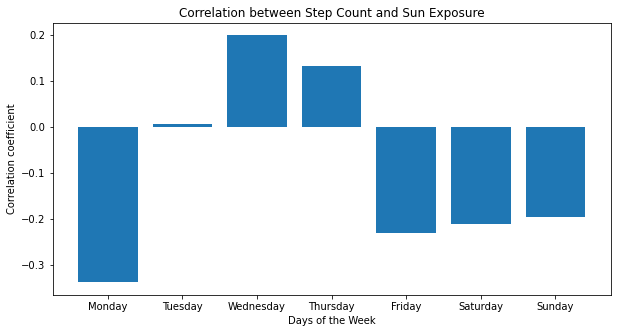

In [79]:
# DO NOT CHANGE THIS CHUNK
# creates a function that calculates the correlaton between step count and sun exposure for each day across the week
def graphsuncorr(df):
#     combines participant step data with sun exposure data
    test = pd.merge(df,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
    t2 = test.groupby(['WeekDay','Week']).agg({'Steps':'mean','Daily global solar exposure (MJ/m*m)':'mean'}).reset_index()
#     dictionary that stores the correlation for days across the week
    cor = {}
#     separate by day of week 
    m = t2.loc[t2['WeekDay']=='Monday']
    t = t2.loc[t2['WeekDay']=='Tuesday']
    w = t2.loc[t2['WeekDay']=='Wednesday']
    th = t2.loc[t2['WeekDay']=='Thursday']
    f = t2.loc[t2['WeekDay']=='Friday']
    s = t2.loc[t2['WeekDay']=='Saturday']
    sn = t2.loc[t2['WeekDay']=='Sunday']

#     calculate correlation (using corr function) individually for days across week, put into dictionary
    cor['Monday'] = m['Steps'].corr(m['Daily global solar exposure (MJ/m*m)'])
    cor['Tuesday'] = t['Steps'].corr(t['Daily global solar exposure (MJ/m*m)'])
    cor['Wednesday'] = w['Steps'].corr(w['Daily global solar exposure (MJ/m*m)'])
    cor['Thursday'] = th['Steps'].corr(th['Daily global solar exposure (MJ/m*m)'])
    cor['Friday'] = f['Steps'].corr(f['Daily global solar exposure (MJ/m*m)'])
    cor['Saturday'] = s['Steps'].corr(s['Daily global solar exposure (MJ/m*m)'])
    cor['Sunday'] = sn['Steps'].corr(sn['Daily global solar exposure (MJ/m*m)'])

# now plot the bar graph
    plt.rcParams["figure.figsize"] = (10,5)
#     goes through dictionary then plots the values 
    plt.bar(range(len(cor)), list(cor.values()), align='center')
#     the x-ticks are keys of the dictionary which are week day names
    plt.xticks(range(len(cor)), list(cor.keys()))
#     set title, x-label, y-label
    plt.xlabel('Days of the Week') 
    plt.ylabel('Correlation coefficient') 
    plt.title("Correlation between Step Count and Sun Exposure")
    plt.show()

    
# call function to get correlation graph for participant    
graphsuncorr(day)

From the graph we can see that for Wednesday, Friday and Sunday your step count have moderate positive correlation with the amount of sunlight as it has a higher corelation coefficient and that these days show a stronger correlation between steps ad sun exposure. The correlation for all days across the week is positive, therefore for days that have higher sun exposure, participant 1 is possible to make more steps.

Now looking at the correlation between step count and rainfall for participant 1:

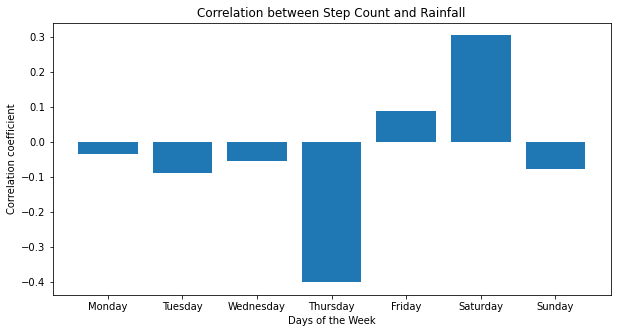

In [80]:
# DO NOT CHANGE THIS CHUNK
# creates a function that calculates the correlaton between step count and rainfall for each day across the week
def graphrfcorr(df):
    #     combines participant step data with rainfall data
    test = pd.merge(df,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
    t2 = test.groupby(['WeekDay','Week']).agg({'Steps':'mean','Rainfall amount (millimetres)':'mean'}).reset_index()
    #     dictionary that stores the correlation for days across the week
    cor = {}
    #     separate by day of week 
    m = t2.loc[t2['WeekDay']=='Monday']
    t = t2.loc[t2['WeekDay']=='Tuesday']
    w = t2.loc[t2['WeekDay']=='Wednesday']
    th = t2.loc[t2['WeekDay']=='Thursday']
    f = t2.loc[t2['WeekDay']=='Friday']
    s = t2.loc[t2['WeekDay']=='Saturday']
    sn = t2.loc[t2['WeekDay']=='Sunday']
    
    #     calculate correlation (using corr function) individually for days across week, put into dictionary

    cor['Monday'] = m['Steps'].corr(m['Rainfall amount (millimetres)'])
    cor['Tuesday'] = t['Steps'].corr(t['Rainfall amount (millimetres)'])
    cor['Wednesday'] = w['Steps'].corr(w['Rainfall amount (millimetres)'])
    cor['Thursday'] = th['Steps'].corr(th['Rainfall amount (millimetres)'])
    cor['Friday'] = f['Steps'].corr(f['Rainfall amount (millimetres)'])
    cor['Saturday'] = s['Steps'].corr(s['Rainfall amount (millimetres)'])
    cor['Sunday'] = sn['Steps'].corr(sn['Rainfall amount (millimetres)'])

    # now plot the bar graph
    plt.rcParams["figure.figsize"] = (10,5)
    #     goes through dictionary then plots the values 
    plt.bar(range(len(cor)), list(cor.values()), align='center')
    #     the x-ticks are keys of the dictionary which are week day names
    plt.xticks(range(len(cor)), list(cor.keys()))
#     plot title, x-label, y-label
    plt.xlabel('Days of the Week') 
    plt.ylabel('Correlation coefficient') 
    plt.title("Correlation between Step Count and Rainfall")
    plt.show()
    
    
# call function to get correlation graph for participant    
graphrfcorr(day)

We can see that for most weekdays and Sunday, the amount of steps participant 1 take show a slight negative correlation with the amount of rain. This means that for days with higher rainfall, they are slightly likely to be less active. However it can be seen that Friday and Saturday has low positive correlation, showing that for these day their steps are not impacted by the rain and continue to make their steps like a day with no rain.

**Overall Results**

The assumption that Participants will be less affected by rainfall during weekdays and show stronger corelation to sun exposure on weekends is not true. Rainfall for most participants show a negative correlation with step count meaning that for days that rain more participants walk less, which does not support the assumption that during weekdays the correlation will still be positive as people still have to walk as much to get to mandatory job or school. Friday and Saturday surprisingly was positive for quite a few participant's step correlation with rainfall, which might suggest these two days people go out as normal and their plans are not impacted by rain. For sun exposure's correation to step count, the initial assumption was that there would be higher correlation on weekends, this could not be identified in the data as for most participants most days of the week showed a similiar weak to moderate correlation and there wasn't any particular day that had a stand out correlation. 

However, it is to note that corelation does not mean causation for this result where the change in one variable is the cause of the change in the values of the other variable. Having higher rain or sun exposure does not cause steps to increase or decrease.

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2